Libraries:


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load Dataset

In [30]:
file_path = "/content/drive/MyDrive/Colab Notebooks/CSE422/Project/unprocessed_dataset.csv"
df = pd.read_csv(file_path)
df.head(5)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751.0,73,Male,Caucasian,Bachelor's,NaN,No,13.297218,6.327112,1.347214,...,No,No,1.725883,No,No,No,Yes,No,No,NaN
1,4752.0,89,Male,Caucasian,NaN,26.827681,No,4.542524,7.619885,0.518767,...,No,No,2.592424,No,No,No,No,Yes,No,NaN
2,4753.0,73,Male,Other,High School,17.795882,No,19.555085,7.844988,1.826335,...,No,No,7.119548,No,Yes,No,Yes,No,No,NaN
3,NaN,74,Female,NaN,High School,33.800817,Yes,12.209266,8.428001,NaN,...,No,Yes,6.481226,No,No,No,No,No,No,NaN
4,NaN,89,Male,Caucasian,NaN,20.716974,No,18.454356,6.310461,0.795498,...,No,No,0.014691,No,No,Yes,Yes,No,No,NaN


In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
print('number of features:', df.shape[1])
print('Classification problem because its predicting two decision in binary')
print('number of datapoints:', df.shape[0])
print(set(df.dtypes))

number of features: 35
Classification problem because its predicting two decision in binary
number of datapoints: 2149
{dtype('int64'), dtype('O'), dtype('float64')}


In [33]:
df['Diagnosis'].value_counts()

,count
Diagnosis,
No,1389
Yes,760


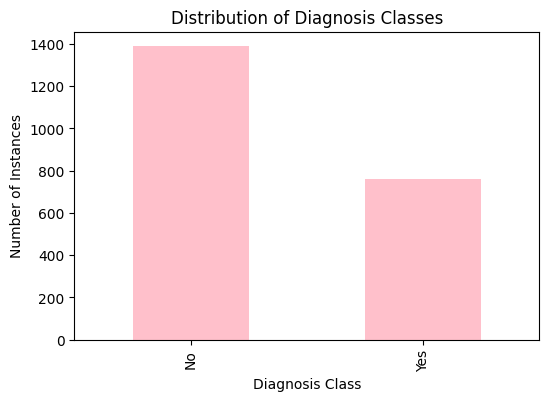

instances aren't equal


In [34]:
class_counts = df['Diagnosis'].value_counts()

# Plot the bar chart
class_counts.plot(kind='bar', color='pink', figsize=(6, 4))

# Add labels and title
plt.xlabel("Diagnosis Class")
plt.ylabel("Number of Instances")
plt.title("Distribution of Diagnosis Classes")

# Show the plot
plt.show()
print("instances aren't equal")

preprocessing

In [35]:
print(df.isnull().sum())
total_nulls = df.isnull().sum().sum()

print("Total Null Values in the Dataset:", total_nulls)

PatientID                    1000
Age                             0
Gender                          0
Ethnicity                     100
EducationLevel                446
BMI                            82
Smoking                        98
AlcoholConsumption             75
PhysicalActivity              167
DietQuality                   245
SleepQuality                  156
FamilyHistoryAlzheimers         0
CardiovascularDisease           0
Diabetes                        0
Depression                      0
HeadInjury                      0
Hypertension                    0
SystolicBP                     60
DiastolicBP                    60
CholesterolTotal               60
CholesterolLDL                 68
CholesterolHDL                 68
CholesterolTriglycerides       68
MMSE                           60
FunctionalAssessment            0
MemoryComplaints                0
BehavioralProblems              0
ADL                             0
Confusion                       0
Disorientation

In [36]:
#categorical
cat=[]
quan=[]
for col in df.columns:
    if df[col].dtype == 'object':  # Check column categorical
        cat.append(col)
    else:
       quan.append(col)
print(cat)
print(quan)

['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']
['PatientID', 'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL', 'DoctorInCharge']


In [37]:
null_col= df.columns[df.isnull().any()]
print(null_col)

Index(['PatientID', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL',
       'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE',
       'PersonalityChanges', 'DifficultyCompletingTasks', 'DoctorInCharge'],
      dtype='object')


In [38]:
df = df.drop(['PatientID', 'DoctorInCharge'], axis = 1)
df.shape


(2149, 33)

Impute

In [39]:

# Impute categorical columns with the mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Impute numerical columns with the mean
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Verify the changes
print(df.isnull().sum())


Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

/tmp/ipython-input-2399098621.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-2399098621.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [40]:
df.head(5)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,Male,Caucasian,Bachelor's,27.662015,No,13.297218,6.327112,1.347214,9.025679,...,6.518877,No,No,1.725883,No,No,No,Yes,No,No
1,89,Male,Caucasian,High School,26.827681,No,4.542524,7.619885,0.518767,7.151293,...,7.118696,No,No,2.592424,No,No,No,No,Yes,No
2,73,Male,Other,High School,17.795882,No,19.555085,7.844988,1.826335,9.673574,...,5.895077,No,No,7.119548,No,Yes,No,Yes,No,No
3,74,Female,Caucasian,High School,33.800817,Yes,12.209266,8.428001,4.969992,8.392554,...,8.965106,No,Yes,6.481226,No,No,No,No,No,No
4,89,Male,Caucasian,High School,20.716974,No,18.454356,6.310461,0.795498,5.597238,...,6.045039,No,No,0.014691,No,No,Yes,Yes,No,No


Encoding

In [41]:
df['Gender'] = df['Gender'].map({ 'Male': 0, 'Female':1 })
ethnicity_mapping = {'Caucasian': 0,'African American': 1,'Asian': 2,'Other': 3}
df['Ethnicity'] = df['Ethnicity'].map(ethnicity_mapping)

education = {'None': 0,'High School': 1,"Bachelor's": 2,'Higher': 3}
df['EducationLevel'] = df['EducationLevel'].map(education)


In [42]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
cols_to_encode = [
    'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
    'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints',
    'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges',
    'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis'
]
for col in cols_to_encode:
    df[col] = label_encoder.fit_transform(df[col].astype(str))  # Handle NaN values

#print(df[cols_to_encode].head())
df.head(5)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,27.662015,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,1,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,4.969992,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,1,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


In [43]:
df.dtypes

,0
Age,int64
Gender,int64
Ethnicity,int64
EducationLevel,int64
BMI,float64
Smoking,int64
AlcoholConsumption,float64
PhysicalActivity,float64
DietQuality,float64
SleepQuality,float64


Heat Map

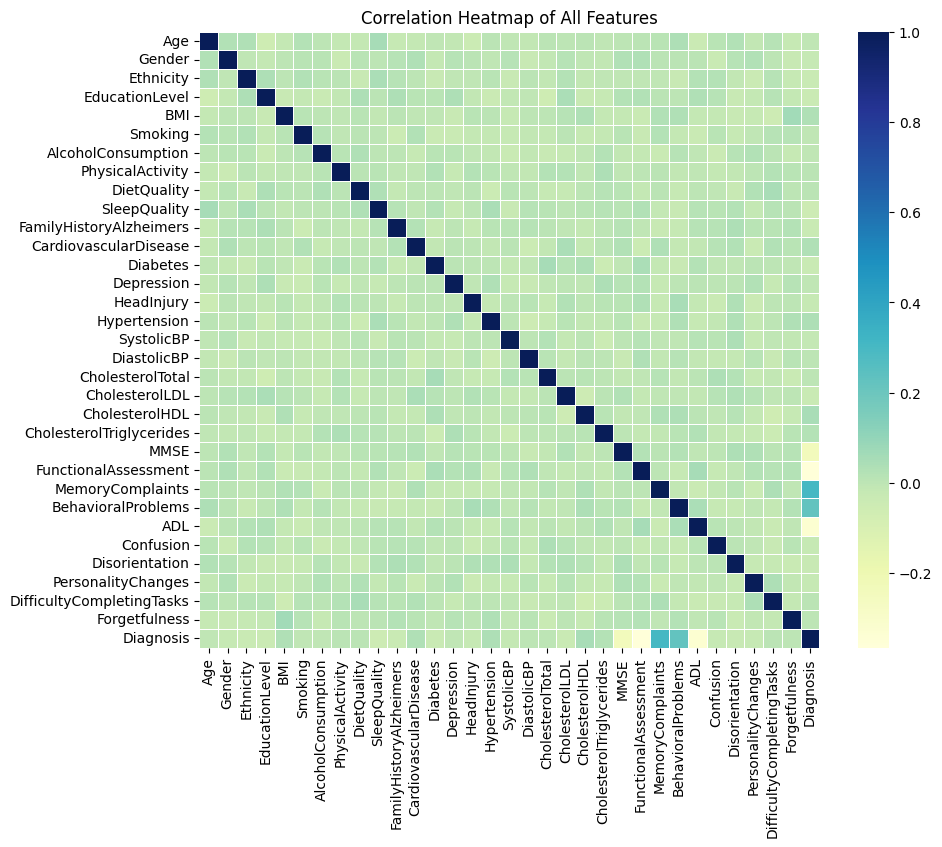

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of All Features')
plt.show()


In [45]:
features = df.drop('Diagnosis', axis=1).columns.to_list()  # Features
print(features)


['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']


In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,-0.212368,-1.012644,-0.676626,0.755541,5.036346e-16,-0.620933,0.580573,0.505604,-1.322324,1.166692,...,0.497506,-0.512477,-0.431257,-1.104434,-0.508131,-0.433531,-0.418281,2.326999,-0.657048,0
1,1.567757,-1.012644,-0.676626,-0.738165,-1.182756e-01,-0.620933,-0.967558,0.974951,-1.624710,0.064776,...,0.704907,-0.512477,-0.431257,-0.810601,-0.508131,-0.433531,-0.418281,-0.429738,1.521959,0
2,-0.212368,-1.012644,2.373871,-0.738165,-1.398628e+00,-0.620933,1.687179,1.056676,-1.147444,1.547577,...,0.281813,-0.512477,-0.431257,0.724491,-0.508131,2.306640,-0.418281,2.326999,-0.657048,0
3,-0.101111,0.987514,-0.676626,-0.738165,8.702398e-01,1.610480,0.388186,1.268342,0.000000,0.794490,...,1.343346,-0.512477,2.318805,0.508044,-0.508131,-0.433531,-0.418281,-0.429738,-0.657048,0
4,1.567757,-1.012644,-0.676626,-0.738165,-9.845327e-01,-0.620933,1.492533,0.499558,-1.523702,-0.848824,...,0.333665,-0.512477,-0.431257,-1.684679,-0.508131,-0.433531,2.390737,2.326999,-0.657048,0


In [47]:
import numpy as np
for col in df.columns.to_list():
 col_var =np.var(df[col])
 print(f'{col}: {round(col_var,2)}')

Age: 1.0
Gender: 1.0
Ethnicity: 1.0
EducationLevel: 1.0
BMI: 1.0
Smoking: 1.0
AlcoholConsumption: 1.0
PhysicalActivity: 1.0
DietQuality: 1.0
SleepQuality: 1.0
FamilyHistoryAlzheimers: 1.0
CardiovascularDisease: 1.0
Diabetes: 1.0
Depression: 1.0
HeadInjury: 1.0
Hypertension: 1.0
SystolicBP: 1.0
DiastolicBP: 1.0
CholesterolTotal: 1.0
CholesterolLDL: 1.0
CholesterolHDL: 1.0
CholesterolTriglycerides: 1.0
MMSE: 1.0
FunctionalAssessment: 1.0
MemoryComplaints: 1.0
BehavioralProblems: 1.0
ADL: 1.0
Confusion: 1.0
Disorientation: 1.0
PersonalityChanges: 1.0
DifficultyCompletingTasks: 1.0
Forgetfulness: 1.0
Diagnosis: 0.23


In [48]:
from sklearn.model_selection import train_test_split


X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print("Training set class distribution:\n", y_train.value_counts())
print("Testing set class distribution:\n", y_test.value_counts())


Training set class distribution:
 Diagnosis
0    972
1    532
Name: count, dtype: int64
Testing set class distribution:
 Diagnosis
0    417
1    228
Name: count, dtype: int64


In [49]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train, y_train)

print("Balanced training set class distribution:\n", y_train_balanced.value_counts())


Balanced training set class distribution:
 Diagnosis
0    972
1    972
Name: count, dtype: int64


In [50]:
# from imblearn.under_sampling import RandomUnderSampler

# # Undersample the majority class
# undersampler = RandomUnderSampler(random_state=42)
# X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)

# # Check class distribution after balancing
# print("Balanced training set class distribution:\n", y_train_balanced.value_counts())


KNN


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7348837209302326

Confusion Matrix:
 [[379  38]
 [133  95]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.91      0.82       417
           1       0.71      0.42      0.53       228

    accuracy                           0.73       645
   macro avg       0.73      0.66      0.67       645
weighted avg       0.73      0.73      0.71       645



In [52]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)


Accuracy: 0.8744186046511628
Confusion Matrix:
 [[363  38]
 [ 43 201]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       401
           1       0.84      0.82      0.83       244

    accuracy                           0.87       645
   macro avg       0.87      0.86      0.87       645
weighted avg       0.87      0.87      0.87       645



In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)


Accuracy: 0.8403100775193798
Confusion Matrix:
 [[368  49]
 [ 54 174]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       417
           1       0.78      0.76      0.77       228

    accuracy                           0.84       645
   macro avg       0.83      0.82      0.82       645
weighted avg       0.84      0.84      0.84       645



{'KNeighborsClassifier': 0.72, 'DecisionTreeClassifier': 0.88, 'LogisticRegression': 0.84}


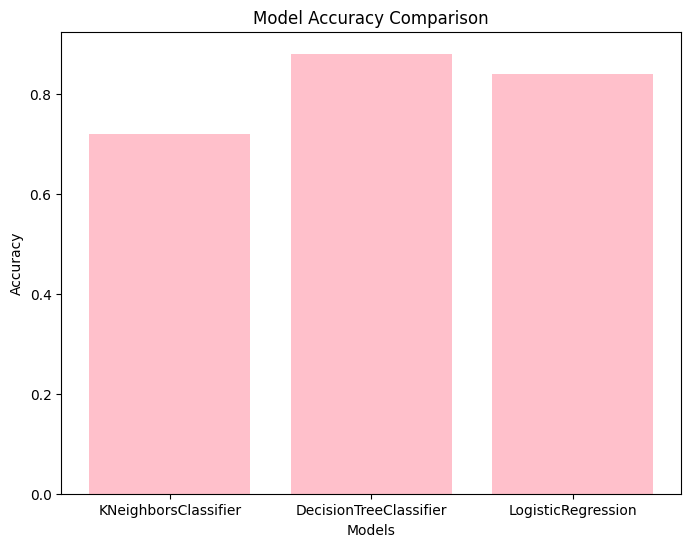

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as acc
import matplotlib.pyplot as plt

classifiers = [KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression()]
clf_accuracies = {}

for model in classifiers:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = acc(y_pred, y_test)
    clf_accuracies[model.__class__.__name__] = round(accuracy, 2)

print(clf_accuracies)

plt.figure(figsize=(8, 6))
plt.bar(clf_accuracies.keys(), clf_accuracies.values(), color='pink')
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()


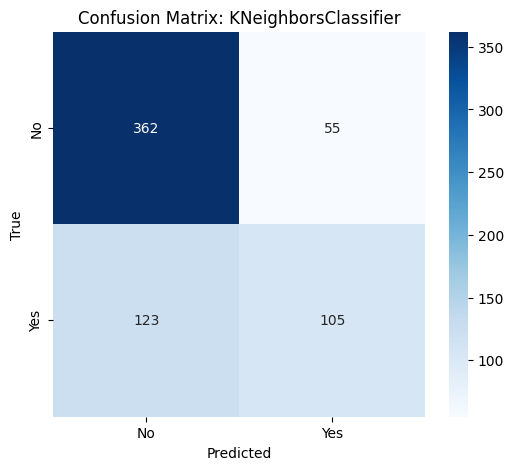

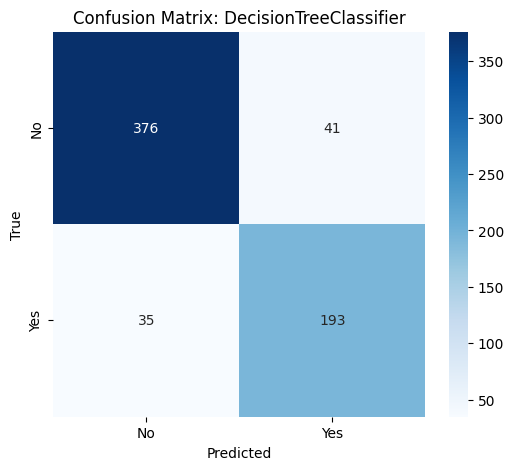

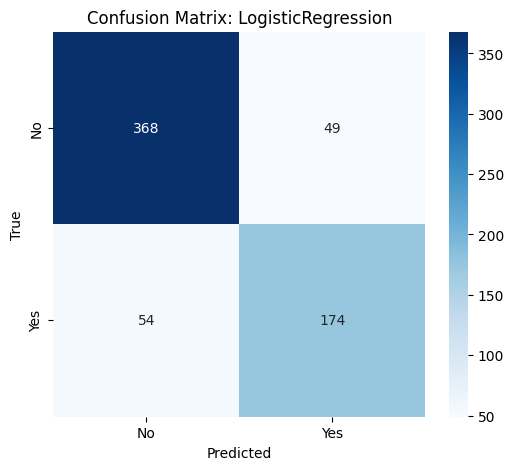

Model Accuracies: {'KNeighborsClassifier': 0.72, 'DecisionTreeClassifier': 0.88, 'LogisticRegression': 0.84}


In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as acc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

classifiers = [KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression()]
clf_accuracies = {}

for model in classifiers:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = acc(y_pred, y_test)
    clf_accuracies[model.__class__.__name__] = round(accuracy, 2)

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f'Confusion Matrix: {model.__class__.__name__}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

print("Model Accuracies:", clf_accuracies)
